In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Process Data

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits['data'].shape

(1797, 64)

In [4]:
x = digits['data']
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
from sklearn.preprocessing import scale
x_scale = scale(x)

### Data Modelling

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_scale)

PCA()

In [7]:
#eigen value
var = pca.explained_variance_ratio_
var[:5]

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155])

In [8]:
var.shape

(64,)

In [9]:
x_scale.shape

(1797, 64)

In [10]:
#eigen vectors
components = pca.components_
components.shape

(64, 64)

In [11]:
components

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [-0.00000000e+00,  8.16570627e-17,  1.34006326e-16, ...,
         1.66533454e-16, -1.73472348e-17, -2.22044605e-16],
       [ 0.00000000e+00,  3.41003582e-17, -2.15119387e-17, ...,
        -6.89552582e-17,  3.61039323e-17,  6.11490025e-17],
       [ 1.00000000e+00, -2.83191000e-18,  5.03596637e-18, ...,
         9.44646642e-18, -1.19101943e-17,  1.39873617e-18]])

### Scree plot

To find optimal number of Components.

In [12]:
var_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_,4))*100
var_cum_sum

array([ 12.03,  21.59,  30.03,  36.53,  41.39,  45.6 ,  49.54,  52.93,
        55.93,  58.86,  61.64,  64.22,  66.5 ,  68.73,  70.9 ,  72.81,
        74.59,  76.23,  77.83,  79.32,  80.67,  81.94,  83.11,  84.17,
        85.15,  86.09,  86.95,  87.79,  88.59,  89.34,  90.07,  90.76,
        91.41,  92.05,  92.64,  93.21,  93.73,  94.21,  94.66,  95.08,
        95.49,  95.89,  96.25,  96.59,  96.92,  97.23,  97.52,  97.8 ,
        98.06,  98.29,  98.51,  98.71,  98.91,  99.09,  99.26,  99.42,
        99.57,  99.71,  99.84,  99.94, 100.02, 100.02, 100.02, 100.02])

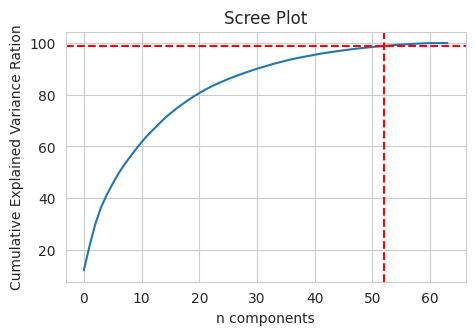

In [13]:
sns.set_style('whitegrid')
fig = plt.figure(dpi = 100,figsize=(4,2.5))
ax = fig.add_axes([1,1,1,1])

ax.plot(var_cum_sum)
ax.axhline(y = 99,color = 'red',ls = '--')
ax.axvline(x = 52,color = 'red',ls = '--')
ax.set(xlabel = 'n components',
      ylabel = 'Cumulative Explained Variance Ration',
      title = 'Scree Plot');

### PCA Model (Final)

In [14]:
#52 component to preserve 90% variance
pca_final = PCA(n_components=52)

In [15]:
pca_final.fit(x_scale)

PCA(n_components=52)

### Compress Data

In [16]:
newData = pca_final.transform(x_scale)

In [17]:
newData.shape

(1797, 52)

### Decompress Data (Reverse transformation)

In [18]:
originalData = pca_final.inverse_transform(newData)

In [19]:
originalData.shape

(1797, 64)